In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

**Exercise 1 - Basics of NN**

**From the MNIST database load the handwritten digits dataset.**

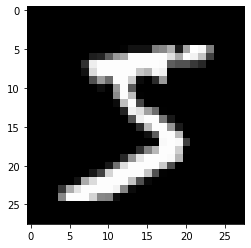

In [3]:
# import MNIST handwritten digits dataset
digits_dataset = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = digits_dataset.load_data()

plt.imshow(X_train[0], cmap = 'gray')
plt.show()

**1. Normalize your dataset before training your model.**

In [4]:
# Normalize dataset before training model
X_train = keras.utils.normalize(X_train, axis = 1)
X_test = keras.utils.normalize(X_test, axis = 1)

**2. Train a neural network once using Adam and once using AdaGrad optimizer.
Hint: Set epochs = 20, neurons of hidden layer = 100, activation function =
ReLU for reproducibility.**

In [5]:
n_epochs = 20
n_neurons = 100

# create model for both optimisers
model_adam_opt = keras.models.Sequential()
model_adagrad_opt = keras.models.Sequential()

# Add a flatten layer to flatten input of model
model_adam_opt.add(keras.layers.Flatten())
model_adam_opt.add(keras.layers.Dense(128, activation = 'relu')) # input layer
model_adam_opt.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer
model_adam_opt.add(keras.layers.Dense(10, activation = 'softmax')) # output layer

# Same for adagrad optimiser
model_adagrad_opt.add(keras.layers.Flatten())
model_adagrad_opt.add(keras.layers.Dense(128, activation = 'relu')) # input layer
model_adagrad_opt.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer
model_adagrad_opt.add(keras.layers.Dense(10, activation = 'softmax')) # output layer

In [6]:
# Compile the model
model_adam_opt.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_adagrad_opt.compile(optimizer='adagrad', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model on training data
history_adam = model_adam_opt.fit(x = X_train, y = y_train, epochs = 20, validation_data = (X_test, y_test))
history_adagrad = model_adagrad_opt.fit(x = X_train, y = y_train, epochs = 20, validation_data = (X_test, y_test))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2676 - accuracy: 0.9209 - val_loss: 0.1452 - val_accuracy: 0.9562
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1092 - accuracy: 0.9664 - val_loss: 0.1110 - val_accuracy: 0.9664
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0747 - accuracy: 0.9763 - val_loss: 0.0865 - val_accuracy: 0.9723
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0550 - accuracy: 0.9824 - val_loss: 0.0863 - val_accuracy: 0.9749
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0403 - accuracy: 0.9869 - val_loss: 0.0958 - val_accuracy: 0.9704
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0323 - accuracy: 0.9894 - val_loss: 0.0879 - val_accuracy: 0.9753
Epoch 7/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0259 - accuracy: 0.9915 - val_loss: 0.0935 - val_accuracy:

**3. Plot the SparseCategoricalCrossentropy loss for both models. Plot the computed
accuracy for both models. Which model performed better while training?**

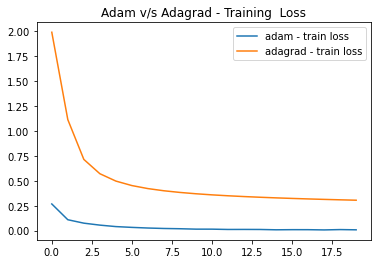

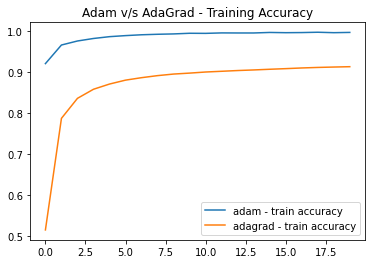

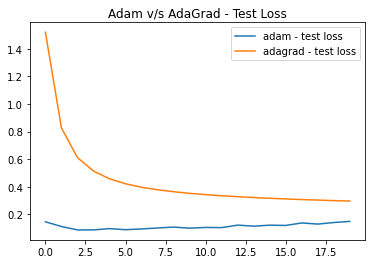

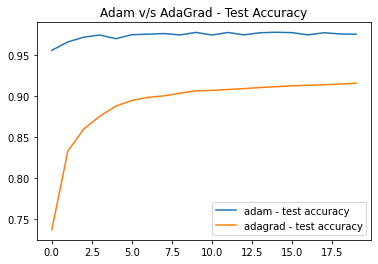

In [7]:
# Plot training and validation performance
plt.title('Adam v/s Adagrad - Training  Loss')
plt.plot(history_adam.history['loss'], label = 'adam - train loss')
plt.plot(history_adagrad.history['loss'], label = 'adagrad - train loss')
plt.legend()
plt.show()

plt.title('Adam v/s AdaGrad - Training Accuracy')
plt.plot(history_adam.history['accuracy'], label = 'adam - train accuracy')
plt.plot(history_adagrad.history['accuracy'], label = 'adagrad - train accuracy')
plt.legend()
plt.show()

plt.title('Adam v/s AdaGrad - Test Loss')
plt.plot(history_adam.history['val_loss'], label = 'adam - test loss')
plt.plot(history_adagrad.history['val_loss'], label = 'adagrad - test loss')
plt.legend()
plt.show()

plt.title('Adam v/s AdaGrad - Test Accuracy')
plt.plot(history_adam.history['val_accuracy'], label = 'adam - test accuracy')
plt.plot(history_adagrad.history['val_accuracy'], label = 'adagrad - test accuracy')
plt.legend()
plt.show()

**4. Compute the model accuracy on the test set for both optimizers. Which model
performed better?**

Adam optimizer model achieves higher accuracy and lower loss on both training and test data.

**5. Familiarize yourself with Layer Normalization and explain how it works.**

Layer normalization method is used to normalise the outputs of activations of neurons in the hidden layer, since these values can vary across a wide range during training. Layer normalisation is applied on the neuron of a single instance across all features. It is not dependant on any batch sizes during training. @To be completed

**6. Using the same dataset to train a neural network with Layer Normalization. Hint:
Set epochs = 20, neurons of hidden layer = 100, activation function = ReLU for
reproducibility.**

In [8]:
model_layer_norm = keras.models.Sequential()

# Add a flatten layer to flatten input of model
model_layer_norm.add(keras.layers.LayerNormalization())
model_layer_norm.add(keras.layers.Flatten())
model_layer_norm.add(keras.layers.Dense(128, activation = 'relu')) # input layer
model_layer_norm.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer
model_layer_norm.add(keras.layers.Dense(10, activation = 'softmax')) # output layer

# Compile the model
model_layer_norm.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit model on training data
history_norm_layer = model_layer_norm.fit(x = X_train, y = y_train, epochs = 20, validation_data = (X_test, y_test))


Epoch 1/20
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2211 - accuracy: 0.9328 - val_loss: 0.1294 - val_accuracy: 0.9637
Epoch 2/20
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1008 - accuracy: 0.9697 - val_loss: 0.1206 - val_accuracy: 0.9678
Epoch 3/20
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0740 - accuracy: 0.9776 - val_loss: 0.1183 - val_accuracy: 0.9685
Epoch 4/20
1875/1875 [==============================] - 1093s 583ms/step - loss: 0.0564 - accuracy: 0.9838 - val_loss: 0.1372 - val_accuracy: 0.9681
Epoch 5/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0456 - accuracy: 0.9864 - val_loss: 0.1346 - val_accuracy: 0.9728
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0381 - accuracy: 0.9891 - val_loss: 0.1383 - val_accuracy: 0.9726
Epoch 7/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0318 - accuracy: 0.9911 - val_loss: 0.1529 - val_a

**a. Compute the SparseCategoricalCrossentropy loss and model accuracy.**

1875/1875 [==============================] - 2s 1ms/step - loss: 0.0082 - accuracy: 0.9976
Train Data Loss: 0.008242768235504627, Training Accuracy: 0.9976166486740112


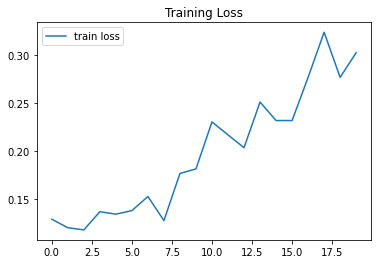

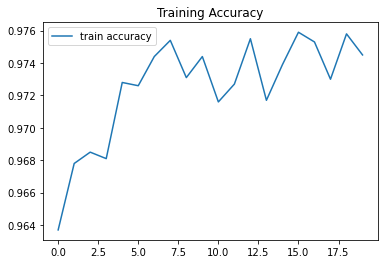

In [9]:
result = model_layer_norm.evaluate(X_train, y_train)
print(f'Train Data Loss: {result[0]}, Training Accuracy: {result[1]}')

# Plot test performance
plt.title('Training Loss')
plt.plot(history_norm_layer.history['val_loss'], label = 'train loss')
plt.legend()
plt.show()

plt.title('Training Accuracy')
plt.plot(history_norm_layer.history['val_accuracy'], label = 'train accuracy')
plt.legend()
plt.show()

**b. Evaluate the model performance using the test dataset.**

313/313 [==============================] - 1s 3ms/step - loss: 0.3021 - accuracy: 0.9745
Test Data Loss: 0.3021416664123535, Test Accuracy: 0.9745000004768372


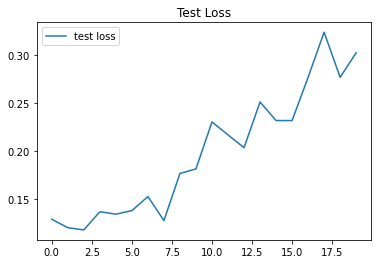

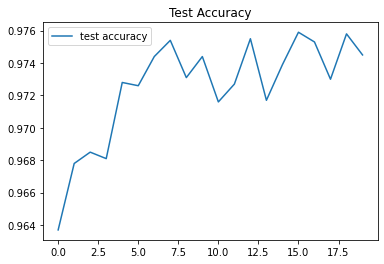

In [12]:
result = model_layer_norm.evaluate(X_test, y_test)
print(f'Test Data Loss: {result[0]}, Test Accuracy: {result[1]}')

# Plot test performance
plt.title('Test Loss')
plt.plot(history_norm_layer.history['val_loss'], label = 'test loss')
plt.legend()
plt.show()

plt.title('Test Accuracy')
plt.plot(history_norm_layer.history['val_accuracy'], label = 'test accuracy')
plt.legend()
plt.show()

**Exercise 2 - Hyper Parameter Optimization**

**1. What are the main challenges with hyper-parameter optimization for neural
networks?**

**2. Inform yourself about variants of Bayesian-HPO and explain them in detail**

**3. Using the same MNIST dataset, optimize the activation function for the output
layer and the number of dropout units in the NN model using the following
methods.**

In [6]:
# Using the same training and test data created in Exercise 1
from sklearn.model_selection import GridSearchCV
import kerastuner as kt
from kerastuner import HyperModel
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dropout

**a. Grid search**

In [19]:
# parameter grid for Grid Search
param_grid = {
    'activation': ['relu', 'softmax', 'sigmoid'],
    'rate': [0.2, 0.4, 0.6, 0.8]
}

# create a wrapper for model as required by KerasClassifier
def build_model(activation = 'relu', rate = 0.2):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(128, activation = 'relu')) # input layer
    model.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer
    model.add(Dropout(rate = rate))
    model.add(keras.layers.Dense(10, activation = activation)) # output layer
    model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
    return model

# create nn model with Keras Classifier
nn_model = KerasClassifier(build_fn = build_model, verbose = 0)

# Grid Search
grid_search = GridSearchCV(
    estimator = nn_model,
    param_grid = param_grid,
)
grid_search_result = grid_search.fit(X_train, y_train)

# Grid Search Performance
print(f'Best params are: {grid_search_result.best_params_} with Accuracy {grid_search_result.best_score_}')

Best params are: {'activation': 'sigmoid', 'rate': 0.2} with Accuracy 0.8843500018119812


**b. Random Search**

In [15]:
class SequentialHyperModel(HyperModel):
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        
    def build(self, hp):

        model = keras.models.Sequential()
        model.add(keras.layers.Flatten())
        model.add(keras.layers.Dense(self.input_shape, activation = 'relu')) # input layer
        model.add(keras.layers.Dense(100, activation = 'relu')) # hidden layer
        model.add(Dropout(rate = hp.Choice('rate', values = [0.2, 0.4, 0.6, 0.8])))
        model.add(keras.layers.Dense(self.num_classes, activation = hp.Choice('activation', values = [ 'relu', 'softmax', 'sigmoid'] ))) # output layer
        model.compile(loss ='sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
        
        return model
    
# create hypermodel instance
hypermodel = SequentialHyperModel(input_shape = 128, num_classes = 10)
    
# creating Random Search hyperparameter tuner
tuner = kt.RandomSearch(
    hypermodel = hypermodel,
    objective = 'accuracy',
    max_trials = 10,
    directory = 'RSHO',
    project_name = 'Random Search'
)


tuner.search(
    x = X_train,
    y = y_train,
    epochs = 10,
    verbose = 0
)

# Record performance
tuner_results = tuner.get_best_hyperparameters()[0]
best_model = tuner.get_best_models(num_models = 1)[0]
loss, accuracy = best_model.evaluate(X_test, y_test)
print('Best params are: rate - {}, activation - {} with Accuracy {} and Loss {}'.format(
    tuner_results.get('rate'),
    tuner_results.get('activation'),
    accuracy,
    loss
))

INFO:tensorflow:Reloading Oracle from existing project RSHO\Random Search\oracle.json
INFO:tensorflow:Reloading Tuner from RSHO\Random Search\tuner0.json
INFO:tensorflow:Oracle triggered exit
313/313 [==============================] - ETA: 3:01 - loss: 0.0499 - accuracy: 0.96 - ETA: 0s - loss: 0.0907 - accuracy: 0.9787 - ETA: 0s - loss: 0.1374 - accuracy: 0.97 - ETA: 0s - loss: 0.1416 - accuracy: 0.96 - ETA: 0s - loss: 0.1339 - accuracy: 0.97 - ETA: 0s - loss: 0.1428 - accuracy: 0.96 - ETA: 0s - loss: 0.1431 - accuracy: 0.96 - ETA: 0s - loss: 0.1292 - accuracy: 0.97 - ETA: 0s - loss: 0.1277 - accuracy: 0.97 - ETA: 0s - loss: 0.1163 - accuracy: 0.97 - ETA: 0s - loss: 0.1114 - accuracy: 0.97 - ETA: 0s - loss: 0.1056 - accuracy: 0.97 - ETA: 0s - loss: 0.1025 - accuracy: 0.97 - 1s 2ms/step - loss: 0.1077 - accuracy: 0.9757
Best params are: rate - 0.2, activation - sigmoid with Accuracy 0.9757000207901001 and Loss 0.10773225128650665


**c. Bayesian Hyper-parameter optimization**

In [17]:
# creating Bayesian Optimization hyperparameter tuner
tuner = kt.BayesianOptimization(
    hypermodel = hypermodel,
    objective = 'accuracy',
    max_trials = 10,
    directory = 'BHO',
    project_name = 'BayesianOptimisation'
)

tuner.search(
    x = X_train,
    y = y_train,
    epochs = 10,
    verbose = 0
)

print('Best params are: rate - {}, activation - {} with Accuracy {} and Loss {}'.format(
    tuner_results.get('rate'),
    tuner_results.get('activation'),
    accuracy,
    loss
))

INFO:tensorflow:Reloading Oracle from existing project BHO\BayesianOptimisation\oracle.json
INFO:tensorflow:Reloading Tuner from BHO\BayesianOptimisation\tuner0.json
INFO:tensorflow:Oracle triggered exit
Best params are: rate - 0.2, activation - sigmoid with Accuracy 0.9757000207901001 and Loss 0.10773225128650665
